In [1]:
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
from vega_datasets import data

#set display for 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### SF Temps Dataset Exercises

In [2]:
df = data.sf_temps()

In [3]:
df.shape

(8759, 2)

In [4]:
df.isna().sum()

temp    0
date    0
dtype: int64

In [5]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [6]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [7]:
#reset index 

df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


<AxesSubplot:xlabel='date'>

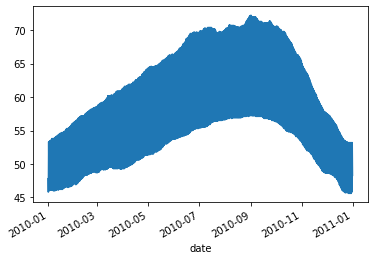

In [9]:
df.temp.plot()

<AxesSubplot:xlabel='date'>

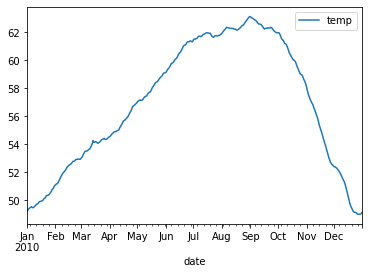

In [10]:
df.resample('D').mean().plot()

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

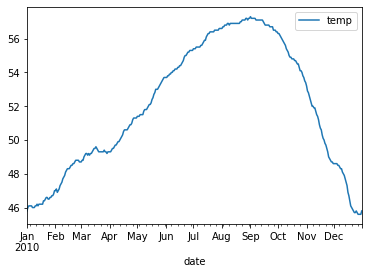

In [11]:
df.resample('D').min().plot()

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

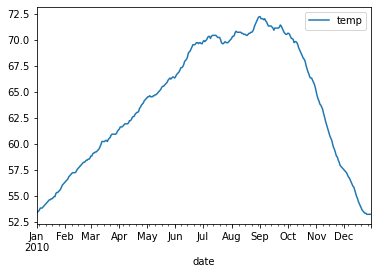

In [12]:
df.resample('D').max().plot()

Which month is the coldest, on average?
- January

In [13]:
df.resample('M').mean().temp.sort_values()

date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

Which month has the highest average temperature?
- September

In [14]:
df.resample('M').mean().temp.sort_values(ascending = False)

date
2010-09-30   62.49
2010-08-31   62.41
2010-07-31   61.77
2010-06-30   60.44
2010-10-31   60.25
2010-05-31   57.97
2010-04-30   55.63
2010-11-30   55.19
2010-03-31   53.96
2010-02-28   52.24
2010-12-31   50.50
2010-01-31   49.98
Name: temp, dtype: float64

In [15]:
monthly = df.temp.resample('M').agg(['min', 'max'])
monthly

#.temp.sort_values(ascending = False)

,min,max
date,,
2010-01-31,45.80,56.20
2010-02-28,46.90,58.60
2010-03-31,48.70,61.30
2010-04-30,49.30,64.30
2010-05-31,51.40,66.40
2010-06-30,53.70,69.70
2010-07-31,55.40,70.40
2010-08-31,56.60,72.20
2010-09-30,56.40,72.20


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

- December

In [16]:
daily = df.temp.resample('D').agg(['min', 'max'])

daily

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80
...,...,...
2010-12-27,45.60,53.20
2010-12-28,45.60,53.20
2010-12-29,45.60,53.20


#### Format Strings for date time

- %b: Returns the first three characters of the month name. 
- %B: Returns the entire month name.
- %d: Returns day of the month, from 1 to 31. 
- %Y: Returns the year in four-digit format.
- %H: Returns the hour. 
- %M: Returns the minute, from 00 to 59. 
- %S: Returns the second, from 00 to 59. 

In [17]:
#add new column for temp difference

daily['temp_diff'] = daily['max'] - daily['min']

#add month column using the index and extract the month and day
daily['month'] = daily.index.strftime('%m-%b')

#group the df by month, get max of temp difference, and sort the values
daily.groupby('month').temp_diff.max().sort_values(ascending = False)

month
08-Aug   15.00
09-Sep   14.90
06-Jun   14.80
07-Jul   14.80
10-Oct   14.40
05-May   13.10
04-Apr   13.00
03-Mar   12.00
11-Nov   11.80
02-Feb    9.90
01-Jan    9.30
12-Dec    8.90
Name: temp_diff, dtype: float64

---

**Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 separate lines.

<AxesSubplot:xlabel='date'>

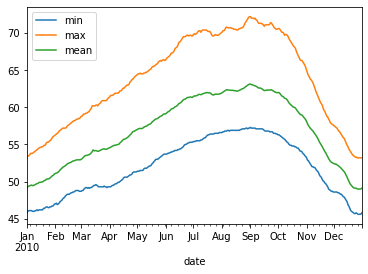

In [18]:
df.temp.resample('D').agg(['min', 'max', 'mean']).plot()

#### Seattle Dataset Exercises

In [19]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [20]:
df.shape

(1461, 6)

In [21]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [22]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [23]:
#set date as index
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


Which year and month combination has the highest amount of precipitation?
- December 2015

In [24]:
#resample precipitation by month, get the sum, sort_values by highest

df.precipitation.resample('M').sum().sort_values(ascending = False)

date
2015-12-31   284.50
2014-03-31   240.00
2015-11-30   212.60
2012-11-30   210.50
2012-03-31   183.00
2012-12-31   174.00
2012-01-31   173.30
2014-10-31   171.50
2012-10-31   170.30
2013-09-30   156.80
2014-02-28   155.20
2013-04-30   149.60
2015-02-28   134.20
2014-11-30   123.10
2015-10-31   122.40
2014-12-31   121.80
2015-03-31   113.50
2014-04-30   106.10
2013-01-31   105.70
2013-11-30    96.30
2014-01-31    94.00
2015-01-31    93.00
2012-02-29    92.30
2015-08-31    83.30
2014-05-31    80.00
2012-06-30    75.10
2013-03-31    69.70
2012-04-30    68.10
2013-05-31    60.50
2014-09-30    56.70
2012-05-31    52.20
2015-04-30    51.60
2014-08-31    46.00
2013-12-31    42.40
2013-02-28    40.30
2013-10-31    39.20
2013-08-31    34.40
2013-06-30    33.10
2012-07-31    26.30
2015-09-30    21.10
2014-07-31    19.60
2014-06-30    18.80
2015-05-31    14.80
2015-06-30     5.90
2015-07-31     2.30
2012-09-30     0.90
2013-07-31     0.00
2012-08-31     0.00
Name: precipitation, dtype: float64

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

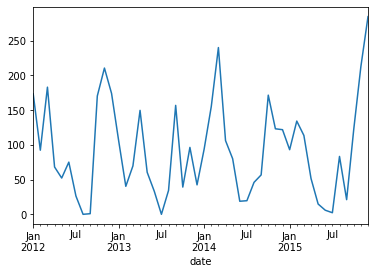

In [25]:
df.precipitation.resample('M').sum().plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

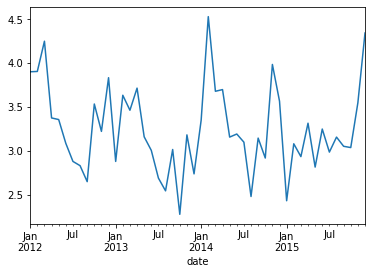

In [26]:
df.wind.resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

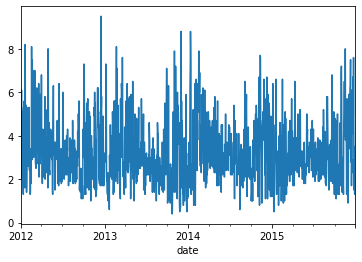

In [27]:
df.wind.resample('D').mean().plot()

Which year-month combination is the windiest?

- December 2015 is highest in this of all time in this df, February 2014 has highest monthly average in this df. 

In [28]:
#resample wind by month, get the sum, sort_values by highest

df.wind.resample('M').sum().sort_values(ascending = False)

date
2015-12-31   134.60
2012-03-31   131.70
2014-02-28   126.80
2012-01-31   120.90
2014-11-30   119.50
2012-12-31   118.80
2014-03-31   114.00
2012-02-29   113.20
2013-04-30   111.40
2014-04-30   110.90
2014-12-31   110.50
2012-10-31   109.50
2013-03-31   107.30
2015-11-30   106.40
2012-05-31   104.00
2014-01-31   103.80
2013-02-28   101.70
2012-04-30   101.20
2015-04-30    99.40
2013-05-31    97.90
2015-08-31    97.80
2014-05-31    97.80
2015-06-30    97.40
2012-11-30    96.60
2014-07-31    96.00
2014-06-30    95.70
2013-11-30    95.40
2014-09-30    94.30
2015-10-31    94.10
2015-07-31    92.50
2012-06-30    92.50
2015-09-30    91.50
2015-03-31    90.90
2013-09-30    90.40
2014-10-31    90.40
2013-06-30    90.10
2013-01-31    89.20
2012-07-31    89.20
2012-08-31    87.70
2015-05-31    87.20
2015-02-28    86.20
2013-12-31    84.80
2013-07-31    83.30
2012-09-30    79.40
2013-08-31    78.80
2014-08-31    76.80
2015-01-31    75.30
2013-10-31    70.50
Name: wind, dtype: float64

In [29]:
#resample wind by month, get mean wind speed, sort values by decending
df.wind.resample('M').mean().sort_values(ascending = False)

date
2014-02-28   4.53
2015-12-31   4.34
2012-03-31   4.25
2014-11-30   3.98
2012-02-29   3.90
2012-01-31   3.90
2012-12-31   3.83
2013-04-30   3.71
2014-04-30   3.70
2014-03-31   3.68
2013-02-28   3.63
2014-12-31   3.56
2015-11-30   3.55
2012-10-31   3.53
2013-03-31   3.46
2012-04-30   3.37
2012-05-31   3.35
2014-01-31   3.35
2015-04-30   3.31
2015-06-30   3.25
2012-11-30   3.22
2014-06-30   3.19
2013-11-30   3.18
2013-05-31   3.16
2014-05-31   3.15
2015-08-31   3.15
2014-09-30   3.14
2014-07-31   3.10
2012-06-30   3.08
2015-02-28   3.08
2015-09-30   3.05
2015-10-31   3.04
2013-09-30   3.01
2013-06-30   3.00
2015-07-31   2.98
2015-03-31   2.93
2014-10-31   2.92
2012-07-31   2.88
2013-01-31   2.88
2012-08-31   2.83
2015-05-31   2.81
2013-12-31   2.74
2013-07-31   2.69
2012-09-30   2.65
2013-08-31   2.54
2014-08-31   2.48
2015-01-31   2.43
2013-10-31   2.27
Name: wind, dtype: float64

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- Sunniest year was 2014

In [30]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [31]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [32]:
#make additional column for year
df['year'] = df.index.year

#create new column for sunny days
df['sunny'] = df.weather == 'sun'

df.head()

,precipitation,temp_max,temp_min,wind,weather,year,sunny
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,False
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,False
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,False
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,False


In [33]:
#groupby year, get mean of sunny, sort values by descending
df.groupby('year')['sunny'].mean().sort_values(ascending = False)

year
2014   0.58
2013   0.56
2015   0.49
2012   0.32
Name: sunny, dtype: float64

In [34]:
#group by year, get value_counts of sunny
df.groupby('year')['sunny'].value_counts()

year  sunny
2012  False    248
      True     118
2013  True     205
      False    160
2014  True     211
      False    154
2015  False    185
      True     180
Name: sunny, dtype: int64

In [35]:
df.groupby('year').sunny.sum().sort_values(ascending = False)

year
2014    211
2013    205
2015    180
2012    118
Name: sunny, dtype: int64

---

In which month does it rain the most?
- November

In [36]:
#create new column for month
df['month'] = df.index.month

df.groupby('month')['precipitation'].sum().sort_values(ascending = False)

month
11   642.50
12   622.70
3    606.20
10   503.40
1    466.00
2    422.00
4    375.40
9    235.50
5    207.50
8    163.70
6    132.90
7     48.20
Name: precipitation, dtype: float64

In [37]:
df.groupby('month')['precipitation'].mean().sort_values(ascending = False)

month
11   5.35
12   5.02
3    4.89
10   4.06
1    3.76
2    3.73
4    3.13
9    1.96
5    1.67
8    1.32
6    1.11
7    0.39
Name: precipitation, dtype: float64

----

Which month has the most number of days with a non-zero amount of precipitation?
- December

In [38]:
#create new column for non_zero precipitation
df['non_zero_rain'] = df.precipitation > 0

#groupby month, get sum of non_zero_rain, sort_values by descending
df.groupby('month').non_zero_rain.sum().sort_values(ascending = False)

month
12    81
2     73
3     73
11    71
1     66
10    61
4     59
6     37
9     35
5     34
8     22
7     11
Name: non_zero_rain, dtype: int64

#### Flights Dataset

In [39]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [40]:
df.isna().sum()

date           0
delay          0
distance       0
origin         0
destination    0
dtype: int64

In [41]:
#set index, sort index

df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


---

Convert any negative delays to 0.

In [42]:
#select delay column and reassign it 
# DataFrame.clip(lower=None, upper=None, axis=None, inplace=False, *args, **kwargs)[source]

df.delay = df.delay.clip(lower = 0)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


----

Which hour of the day has the highest average delay?
- Hour 3

In [43]:
#create column for hour
df['hour'] = df.index.hour
#create column for day of the week
df['day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [44]:
#group by hour, get mean of delay and sort values by descending
df.groupby('hour').delay.mean().sort_values(ascending = False)

hour
3    302.50
1    170.00
0    127.92
23    65.35
22    32.70
21    21.63
20    17.89
19    16.26
18    14.51
16    13.88
17    13.20
15    13.14
13    11.45
14    10.75
12     9.21
11     7.36
10     5.85
9      5.00
8      4.03
7      3.07
6      2.49
5      0.51
Name: delay, dtype: float64

---

Does the day of the week make a difference in the delay amount?
- Yes, the longest delays by average occur on Friday's while Monday's have the shortest delays by average.

In [45]:
#group by day, get the mean of delay, sort by descending
df.groupby('day').delay.mean().sort_values(ascending = False)

day
Friday      17.76
Thursday    12.82
Wednesday   11.03
Sunday      10.41
Tuesday      9.41
Saturday     8.43
Monday       7.17
Name: delay, dtype: float64

---

Does the month make a difference in the delay amount?
- Yes, the highest average delay happens in February and the lowest average delay happens in March.

In [46]:
#create a column for month name
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [47]:
#groupby month, get delay mean, sort values by descending
df.groupby('month').delay.mean().sort_values(ascending = False)

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

#### Iowa Electricity

In [48]:
df = data.iowa_electricity()
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [49]:
df.isna().sum()

year              0
source            0
net_generation    0
dtype: int64

In [50]:
df.dtypes

year              datetime64[ns]
source                    object
net_generation             int64
dtype: object

In [51]:
#set index, sort index
df = df.set_index('year').sort_index()
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [52]:
df.source.values

array(['Fossil Fuels', 'Nuclear Energy', 'Renewables', 'Fossil Fuels',
       'Nuclear Energy', 'Renewables', 'Fossil Fuels', 'Nuclear Energy',
       'Renewables', 'Fossil Fuels', 'Nuclear Energy', 'Renewables',
       'Nuclear Energy', 'Renewables', 'Fossil Fuels', 'Renewables',
       'Fossil Fuels', 'Nuclear Energy', 'Renewables', 'Fossil Fuels',
       'Nuclear Energy', 'Renewables', 'Fossil Fuels', 'Nuclear Energy',
       'Renewables', 'Nuclear Energy', 'Fossil Fuels', 'Nuclear Energy',
       'Renewables', 'Fossil Fuels', 'Nuclear Energy', 'Renewables',
       'Fossil Fuels', 'Nuclear Energy', 'Renewables', 'Fossil Fuels',
       'Renewables', 'Fossil Fuels', 'Nuclear Energy', 'Nuclear Energy',
       'Renewables', 'Fossil Fuels', 'Fossil Fuels', 'Nuclear Energy',
       'Renewables', 'Renewables', 'Fossil Fuels', 'Nuclear Energy',
       'Fossil Fuels', 'Nuclear Energy', 'Renewables'], dtype=object)

In [53]:
df.source.nunique()

3

In [54]:
df.shape

(51, 2)

grouped_df = df.groupby(['labels', df.index]).agg({'amounts': 'sum'})

Group df by "labels"

percents_df = grouped_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Compute percents

print(percents_df)

df['Courses_Fee'] = df.groupby(['Courses'])['Fee'].transform(lambda x: x/x.sum())

#### Format Strings for date time

- %b: Returns the first three characters of the month name. 
- %B: Returns the entire month name.
- %d: Returns day of the month, from 1 to 31. 
- %Y: Returns the year in four-digit format.
- %H: Returns the hour. 
- %M: Returns the minute, from 00 to 59. 
- %S: Returns the second, from 00 to 59. 

For each row, calculate the percentage of the year's total that energy source provided.

In [56]:
#add year column using the index and extract the year

df['yr'] = df.index.year
df.head()


,source,net_generation,yr
year,,,
2001-01-01,Fossil Fuels,35361,2001
2001-01-01,Nuclear Energy,3853,2001
2001-01-01,Renewables,1437,2001
2002-01-01,Fossil Fuels,35991,2002
2002-01-01,Nuclear Energy,4574,2002


df['values_var'] / df.groupby('group_var')['values_var'].transform('sum')

In [57]:
df.groupby(['yr', 'source'])['net_generation'].transform('sum')

year
2001-01-01    35361
2001-01-01     3853
2001-01-01     1437
2002-01-01    35991
2002-01-01     4574
2002-01-01     1963
2003-01-01    36234
2003-01-01     3988
2003-01-01     1885
2004-01-01    36205
2004-01-01     4929
2004-01-01     2102
2005-01-01     4538
2005-01-01     2724
2005-01-01    36883
2006-01-01     3364
2006-01-01    37014
2006-01-01     5095
2007-01-01     3870
2007-01-01    41389
2007-01-01     4519
2008-01-01     5070
2008-01-01    42734
2008-01-01     5282
2009-01-01     8560
2009-01-01     4679
2009-01-01    38620
2010-01-01     4451
2010-01-01    10308
2010-01-01    42750
2011-01-01     5215
2011-01-01    11795
2011-01-01    39361
2012-01-01     4347
2012-01-01    14949
2012-01-01    37379
2013-01-01    16476
2013-01-01    34873
2013-01-01     5321
2014-01-01     4152
2014-01-01    17452
2014-01-01    35250
2015-01-01    32319
2015-01-01     5243
2015-01-01    19091
2016-01-01    21241
2016-01-01    28437
2016-01-01     4703
2017-01-01    29329
2017-01-01     

In [ ]:
#df['net_generation']/df.groupby(['yr', 'source'])['net_generation'].transform('sum'), only produces 1.00 every col

df.groupby(["Salesman"])\
.agg({"Total Amount" : "sum"})[["Total Amount"]]\
.apply(lambda x: 100*x/x.sum())\
.sort_values(by="Total Amount", ascending=False)

In [58]:
df.groupby(['yr', 'source'])\
.agg({'net_generation': 'sum'})[['net_generation']]\
.groupby(level = 0).apply(lambda x: 100 * x / x.sum())
#cat plot 

net_generation
yr   source                        
2001 Fossil Fuels             86.99
     Nuclear Energy            9.48
     Renewables                3.53
2002 Fossil Fuels             84.63
     Nuclear Energy           10.76
     Renewables                4.62
2003 Fossil Fuels             86.05
     Nuclear Energy            9.47
     Renewables                4.48
2004 Fossil Fuels             83.74
     Nuclear Energy           11.40
     Renewables                4.86
2005 Fossil Fuels             83.55
     Nuclear Energy           10.28
     Renewables                6.17
2006 Fossil Fuels             81.40
     Nuclear Energy           11.20
     Renewables                7.40
2007 Fossil Fuels             83.15
     Nuclear Energy            9.08
     Renewables                7.77
2008 Fossil Fuels             80.50
     Nuclear Energy            9.95
     Renewables                9.55
2009 Fossil Fuels             74.47
     Nuclear Energy            9.02
     Renewables               16.51
2010 Fossil Fuels             74.34
     Nuclear Energy            7.74
     Renewables               17.92
2011 Fossil Fuels             69.82
     Nuclear Energy            9.25
     Renewables               20.92
2012 Fossil Fuels             65.95
     Nuclear Energy            7.67
     Renewables               26.38
2013 Fossil Fuels             61.54
     Nuclear Energy            9.39
     Renewables               29.07
2014 Fossil Fuels             62.00
     Nuclear Energy            7.30
     Renewables               30.70
2015 Fossil Fuels             57.05
     Nuclear Energy            9.25
     Renewables               33.70
2016 Fossil Fuels             52.29
     Nuclear Energy            8.65
     Renewables               39.06
2017 Fossil Fuels             51.93
     Nuclear Energy            9.23
     Renewables               38.84

---

In [ ]:
df_ie = data.iowa_electricity()

In [ ]:
#set index to year, sort index

df_ie = df_ie.set_index('year').sort_index()
df_ie.head()

In [ ]:
df_ie.groupby('source').sum()

In [68]:
df = data.iowa_electricity()

#create variable converted to dt
df.year = pd.to_datetime(df.year, format = '%Y-%m-%d')

#create pivot table
df = df.pivot(index = 'year', columns = 'source')
df

net_generation                          
source       Fossil Fuels Nuclear Energy Renewables
year                                               
2001-01-01          35361           3853       1437
2002-01-01          35991           4574       1963
2003-01-01          36234           3988       1885
2004-01-01          36205           4929       2102
2005-01-01          36883           4538       2724
2006-01-01          37014           5095       3364
2007-01-01          41389           4519       3870
2008-01-01          42734           5282       5070
2009-01-01          38620           4679       8560
2010-01-01          42750           4451      10308
2011-01-01          39361           5215      11795
2012-01-01          37379           4347      14949
2013-01-01          34873           5321      16476
2014-01-01          35250           4152      17452
2015-01-01          32319           5243      19091
2016-01-01          28437           4703      21241
2017-01-01          29329           5214      21933

In [69]:
#rename columns 
df.columns = ['fossils', 'nuclear', 'renewables']

#add column for net energy
df['net_energy'] = df.fossils + df.nuclear + df.renewables

#create percentage columns
df['fossils_percent'] = (df.fossils / df.net_energy) * 100
df['nuclear_percent'] = (df.nuclear / df.net_energy) * 100 
df['renewables_percent'] = (df.renewables / df.net_energy) * 100

df.head()

,fossils,nuclear,renewables,net_energy,fossils_percent,nuclear_percent,renewables_percent
year,,,,,,,
2001-01-01,35361,3853,1437,40651,86.99,9.48,3.53
2002-01-01,35991,4574,1963,42528,84.63,10.76,4.62
2003-01-01,36234,3988,1885,42107,86.05,9.47,4.48
2004-01-01,36205,4929,2102,43236,83.74,11.40,4.86
2005-01-01,36883,4538,2724,44145,83.55,10.28,6.17


Lineplot of generation over time, color by source

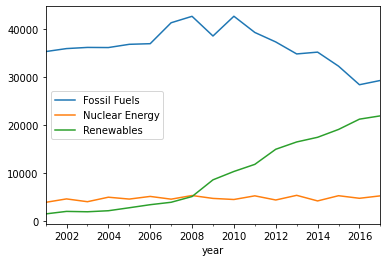

In [70]:
df.fossils.plot(label = 'Fossil Fuels')
df.nuclear.plot(label = 'Nuclear Energy')
df.renewables.plot(label = 'Renewables')

plt.legend()

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [72]:
#change pivot table to years as columns 
df.pivot_table(columns = 'year')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
fossils,35361.00,35991.00,36234.00,36205.00,36883.00,37014.00,41389.00,42734.00,38620.00,42750.00,39361.00,37379.00,34873.00,35250.00,32319.00,28437.00,29329.00
fossils_percent,86.99,84.63,86.05,83.74,83.55,81.40,83.15,80.50,74.47,74.34,69.82,65.95,61.54,62.00,57.05,52.29,51.93
net_energy,40651.00,42528.00,42107.00,43236.00,44145.00,45473.00,49778.00,53086.00,51859.00,57509.00,56371.00,56675.00,56670.00,56854.00,56653.00,54381.00,56476.00
nuclear,3853.00,4574.00,3988.00,4929.00,4538.00,5095.00,4519.00,5282.00,4679.00,4451.00,5215.00,4347.00,5321.00,4152.00,5243.00,4703.00,5214.00
nuclear_percent,9.48,10.76,9.47,11.40,10.28,11.20,9.08,9.95,9.02,7.74,9.25,7.67,9.39,7.30,9.25,8.65,9.23
renewables,1437.00,1963.00,1885.00,2102.00,2724.00,3364.00,3870.00,5070.00,8560.00,10308.00,11795.00,14949.00,16476.00,17452.00,19091.00,21241.00,21933.00
renewables_percent,3.53,4.62,4.48,4.86,6.17,7.40,7.77,9.55,16.51,17.92,20.92,26.38,29.07,30.70,33.70,39.06,38.84


Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

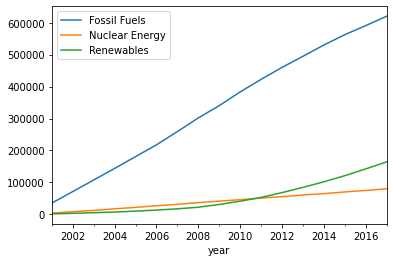

In [73]:
df.fossils.cumsum().plot(label = 'Fossil Fuels')
df.nuclear.cumsum().plot(label = 'Nuclear Energy')
df.renewables.cumsum().plot(label = 'Renewables')
plt.legend()

In [75]:
import altair as alt
source = data.iowa_electricity()

alt.Chart(source, title = "Iowa's Renewable Energy Boom").mark_area().encode(
    x = alt.X(
        "year:T",
        title = "Year"
    ),
    y = alt.Y(
        "net_generation:Q",
        stack = "normalize",
        title = "Share of Net Generation",
        axis = alt.Axis(format = ".0%"),
    ),
    color = alt.Color(
        "source:N",
        legend = alt.Legend(title = "Electricity source"),
    )
)


alt.Chart(...)

Is the total generation increasing over time?

- Yes 

How would you control for increasing consumption over time when considering how much energy is coming from each source? Express each number as a % of the year's total.

   - Looking at them separately helps provide context, also looking at each increase as a percentage and creating a column that also accounts for percentage change may be helpful.

---


    Use the sf_temps dataset
    Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
    How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
    Create pretty labels for time plots
    Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar
